In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [15]:
train_data = pd.read_csv('/kaggle/input/assignment1/test.csv')
test_data = pd.read_csv('/kaggle/input/assignment1/train.csv')

In [16]:
print("Training Data Head:")
print(train_data.head())
print("Test Data Head:")
print(test_data.head())

Training Data Head:
   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]
Test Data Head:
   5  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.608  0.609  0.610  \
0  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  4 

In [17]:
X_train = train_data.drop('7', axis=1)  # Drop the label column
y_train = train_data['7']               # Use the first column as labels

X_test = test_data.drop('5', axis=1)    # Same for test data
y_test = test_data['5']

In [5]:
print(train_data.columns)

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)


In [19]:
common_columns = X_train.columns.intersection(X_test.columns)

In [20]:
X_train = X_train[common_columns]
X_test = X_test[common_columns]

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Now X_train is a NumPy array
X_test = scaler.transform(X_test)

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [23]:
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [25]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1213 - loss: -3131.5051 - val_accuracy: 0.1090 - val_loss: -58831.0312
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1174 - loss: -138953.3750 - val_accuracy: 0.1090 - val_loss: -562121.0625
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1163 - loss: -843710.1250 - val_accuracy: 0.1090 - val_loss: -2025361.1250
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1125 - loss: -2612383.5000 - val_accuracy: 0.1090 - val_loss: -4866820.0000
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1200 - loss: -6019330.0000 - val_accuracy: 0.1090 - val_loss: -9376837.0000
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1121 - loss: -11111743.0000 - val_accuracy: 0.1090 - val_loss: -15802480.0000
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1079 - loss: -17811196.0000 - val_accuracy: 0.1090 - val_loss: -24324522.0000
Epoch 8/50

In [26]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Adjust for binary classification
print("Test Data Evaluation Metrics:")
print(classification_report(y_test, y_pred))


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Test Data Evaluation Metrics:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5923
           1       0.11      1.00      0.20      6742
           2       0.00      0.00      0.00      5958
           3       0.00      0.00      0.00      6131
           4       0.00      0.00      0.00      5842
           5       0.00      0.00      0.00      5420
           6       0.00      0.00      0.00      5918
           7       0.00      0.00      0.00      6265
           8       0.00      0.00      0.00      5851
           9       0.00      0.00      0.00      5949

    accuracy                           0.11     59999
   macro avg       0.01      0.10      0.02     59999
weighted avg       0.01      0.11      0.02     59999



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
model.save('mlp_model.h5')

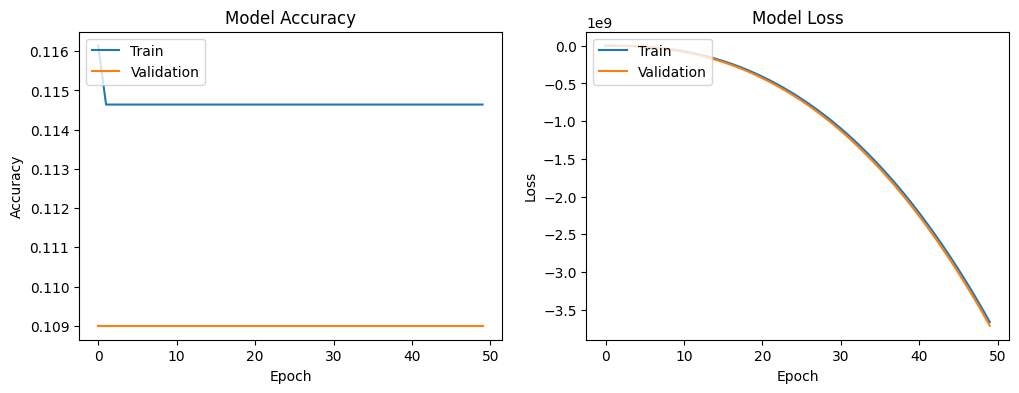

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


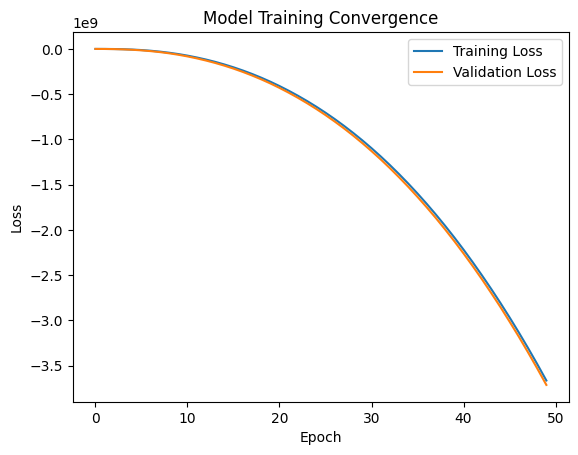

In [34]:
# Example code to generate training convergence plot
import matplotlib.pyplot as plt

# Assuming history is obtained from model training using model.fit()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Convergence')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [36]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict probabilities using model.predict()
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class predictions by using argmax
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)
# Calculate precision, recall, and F1 score (for multi-class classification, use 'macro' or 'weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')

# Print the performance metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Accuracy: 9.87%
Precision: 0.97%
Recall: 9.87%
F1 Score: 1.77%


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from tensorflow.keras.layers import Dense, Dropout

In [46]:
from tensorflow.keras.utils import to_categorical

# Assuming y_train and y_test contain your labels
y_train_binarized = to_categorical(y_train, num_classes=10)
y_test_binarized = to_categorical(y_test, num_classes=10)

from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)


In [49]:
# Assuming the mismatch is caused by dropping some rows in the feature set but not the labels:
X_train_scaled = X_train_scaled[:len(y_train_binarized)]  # Align the feature data length with the labels

# Now try training again
history_v1 = model_v1.fit(X_train_scaled, y_train_binarized, validation_data=(X_test_scaled, y_test_binarized),
                          epochs=100, batch_size=64, callbacks=[lr_scheduler])


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.1054 - loss: 2.4394 - val_accuracy: 0.0830 - val_loss: 2.6039 - learning_rate: 0.0010
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1125 - loss: 2.3061 - val_accuracy: 0.1185 - val_loss: 2.3131 - learning_rate: 0.0010
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.1193 - loss: 2.3018 - val_accuracy: 0.1076 - val_loss: 2.3218 - learning_rate: 0.0010
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.1125 - loss: 2.3015 - val_accuracy: 0.1034 - val_loss: 2.2928 - learning_rate: 0.0010
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1113 - loss: 2.3021 - val_accuracy: 0.1133 - val_loss: 2.3040 - learning_rate: 0.0010
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1139 - loss: 2.3002 - val_accuracy: 0.1125 - val_loss: 2.3012 - learning_rate: 0.0010
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.1109 - l

In [51]:
y_pred_prob_v1 = model_v1.predict(X_test_scaled)
y_pred_classes_v1 = np.argmax(y_pred_prob_v1, axis=1)

accuracy_v1 = accuracy_score(y_test, y_pred_classes_v1)
precision_v1 = precision_score(y_test, y_pred_classes_v1, average='weighted')
recall_v1 = recall_score(y_test, y_pred_classes_v1, average='weighted')
f1_v1 = f1_score(y_test, y_pred_classes_v1, average='weighted')

# Print the performance metrics for Variation 1
print(f"Variation 1 - Extra Hidden Layer: Accuracy: {accuracy_v1 * 100:.2f}%")
print(f"Variation 1 - Extra Hidden Layer: Precision: {precision_v1 * 100:.2f}%")
print(f"Variation 1 - Extra Hidden Layer: Recall: {recall_v1 * 100:.2f}%")
print(f"Variation 1 - Extra Hidden Layer: F1 Score: {f1_v1 * 100:.2f}%")

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Variation 1 - Extra Hidden Layer: Accuracy: 11.34%
Variation 1 - Extra Hidden Layer: Precision: 4.88%
Variation 1 - Extra Hidden Layer: Recall: 11.34%
Variation 1 - Extra Hidden Layer: F1 Score: 2.49%


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
# Define a model with larger hidden layers
def build_mlp_model_variation_2(input_shape):
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(input_shape,)))  # Increased units
    model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu'))  # Increased units
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # Increased units
    model.add(Dense(10, activation='softmax'))  # Output layer with softmax activation
    return model

# Compile and train the model
model_v2 = build_mlp_model_variation_2(X_train_scaled.shape[1])
model_v2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history_v2 = model_v2.fit(X_train_scaled, y_train_binarized, validation_data=(X_test_scaled, y_test_binarized),
                          epochs=100, batch_size=64, callbacks=[lr_scheduler])

# Evaluate the model
y_pred_prob_v2 = model_v2.predict(X_test_scaled)
y_pred_classes_v2 = np.argmax(y_pred_prob_v2, axis=1)

accuracy_v2 = accuracy_score(y_test, y_pred_classes_v2)
precision_v2 = precision_score(y_test, y_pred_classes_v2, average='weighted')
recall_v2 = recall_score(y_test, y_pred_classes_v2, average='weighted')
f1_v2 = f1_score(y_test, y_pred_classes_v2, average='weighted')

# Print the performance metrics for Variation 2
print(f"Variation 2 - Larger Hidden Layers: Accuracy: {accuracy_v2 * 100:.2f}%")
print(f"Variation 2 - Larger Hidden Layers: Precision: {precision_v2 * 100:.2f}%")
print(f"Variation 2 - Larger Hidden Layers: Recall: {recall_v2 * 100:.2f}%")
print(f"Variation 2 - Larger Hidden Layers: F1 Score: {f1_v2 * 100:.2f}%")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.1039 - loss: 2.5028 - val_accuracy: 0.1687 - val_loss: 4.5875 - learning_rate: 0.0010
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.1030 - loss: 2.3274 - val_accuracy: 0.0713 - val_loss: 3.7109 - learning_rate: 0.0010
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1129 - loss: 2.3107 - val_accuracy: 0.1034 - val_loss: 3.6199 - learning_rate: 0.0010
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.1064 - loss: 2.3055 - val_accuracy: 0.0991 - val_loss: 2.9627 - learning_rate: 0.0010
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.1319 - loss: 2.2980 - val_accuracy: 0.1320 - val_loss: 2.6694 - learning_rate: 0.0010
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - accuracy: 0.1207 - loss: 2.3007 - val_accuracy: 0.1467 - val_loss: 2.7858 - learning_rate: 0.0010
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.1283 - l